In [1]:
import numpy as np
import pandas as pd
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
# Load dataset langsung dari Google Drive
df = pd.read_csv('https://drive.google.com/uc?id=15RfMD9lNkpS3cVN7j3_dsJKZ8_5RJG5z')
df.head()


,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [4]:
df.isnull().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [5]:
dates = df['date'].values
temp  = df['meantemp'].values

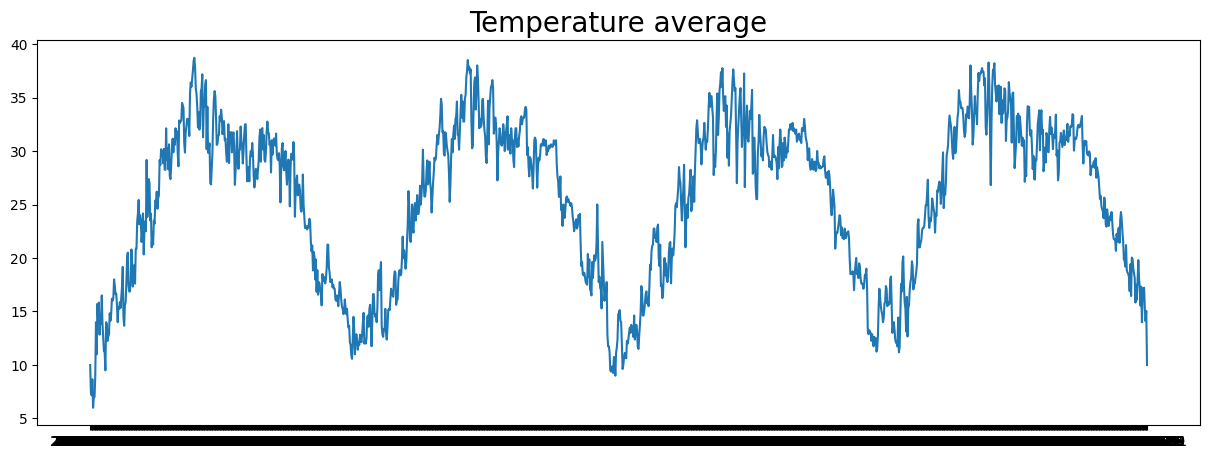

In [6]:
plt.figure(figsize=(15,5))
plt.plot(dates, temp)
plt.title('Temperature average',
          fontsize=20);

In [7]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [8]:
train_set = windowed_dataset(temp, window_size=60, batch_size=100, shuffle_buffer=1000)
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
])

In [9]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set,epochs=100)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 99ms/step - loss: 24.9655 - mae: 25.4655
Epoch 2/100


d:\UB\Dicoding\GitHub\Dicoding_Akmal\.venv\lib\site-packages\keras\src\trainers\epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 24.8622 - mae: 25.3622
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 24.7460 - mae: 25.2460
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 24.6283 - mae: 25.1283
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 24.7135 - mae: 25.2135
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 24.2672 - mae: 24.7672
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 24.2141 - mae: 24.7141
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 24.0700 - mae: 24.5700
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 23.8282 - mae: 24.3282
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 23.5946 - mae: 24.0946
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 23.0386 - mae: 23.5386
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 22.9122 - mae: 23.4122
Epoch 13/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 22.3317 - mae: 22.8317
Epoch 14/100

In [10]:
forecast = history.model.predict(train_set)
forecast

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


array([[29.862686],
       [31.140362],
       [31.017998],
       ...,
       [34.933395],
       [30.436533],
       [23.739676]], dtype=float32)